In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Load the Datasets

In [ ]:
df = pd.read_json("/content/gdrive/MyDrive/IOMP/Sarcasm_Headlines_Dataset.json/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
dfv2 = pd.read_json("/content/gdrive/MyDrive/IOMP/Sarcasm_Headlines_Dataset_v2.json/Sarcasm_Headlines_Dataset_v2.json", lines=True)
dfv2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
df=pd.concat([df,dfv2])
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df.head(100)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
95,https://www.theonion.com/hunter-s-thompson-sho...,hunter s. thompson shoots mouth off one last time,1
96,https://www.huffingtonpost.com/entry/inhofe-ba...,inhofe's grand climate conspiracy theory: it's...,0
97,https://www.huffingtonpost.com/entry/questions...,5 questions i wish younger people would stop a...,0
98,https://www.huffingtonpost.com/entry/albuquerq...,albuquerque shooter on the loose; gunman leave...,0


In [ ]:
df.count()

article_link    55328
headline        55328
is_sarcastic    55328
dtype: int64

In [ ]:

df["is_sarcastic"].value_counts()

0    29970
1    25358
Name: is_sarcastic, dtype: int64

<Axes: xlabel='is_sarcastic', ylabel='count'>

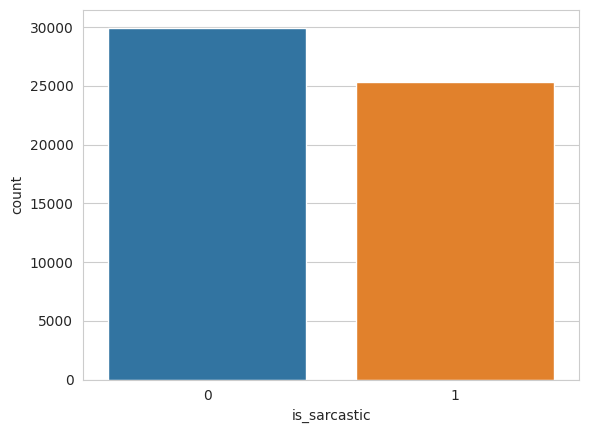

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic', data=df)

###Split the data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.headline.values
y = df.is_sarcastic.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((44262,), (44262,), (11066,), (11066,))

###Tokenization and Padding

In [ ]:
vocab_size = 10000
max_length = 32
embedding_dim = 16
oov_token = '<oov>'
padding_type = 'post'
trunc_type = 'post'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded.shape, y_train.shape, testing_padded.shape, y_test.shape

((44262, 32), (44262,), (11066, 32), (11066,))

###Building and Compiling

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
model = tf.keras.models.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
], name="sarcasm-detection-model")

model.compile(loss="binary_crossentropy",   #MAE,MSE,categorical cross entropy
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
             metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sarcasm-detection-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 16)            160000    
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                16416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)     

###Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping   #,ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor="val_loss",
                  mode="min",
                  verbose=1,
                  patience=10,
                 restore_best_weights=True)
]

###Fitting the model

In [ ]:
history = model.fit(training_padded, y_train,
                   batch_size=256, epochs=1000,
                   validation_split=0.1,
                   callbacks=callbacks)

Epoch 1/1000
156/156 [==============================] - 4s 13ms/step - loss: 0.6914 - accuracy: 0.5341 - val_loss: 0.6889 - val_accuracy: 0.5487
Epoch 2/1000
156/156 [==============================] - 2s 11ms/step - loss: 0.6882 - accuracy: 0.5425 - val_loss: 0.6848 - val_accuracy: 0.5494
Epoch 3/1000
156/156 [==============================] - 1s 7ms/step - loss: 0.6810 - accuracy: 0.5659 - val_loss: 0.6677 - val_accuracy: 0.5916
Epoch 4/1000
156/156 [==============================] - 1s 7ms/step - loss: 0.6568 - accuracy: 0.6360 - val_loss: 0.6201 - val_accuracy: 0.7687
Epoch 5/1000
156/156 [==============================] - 1s 7ms/step - loss: 0.6029 - accuracy: 0.7085 - val_loss: 0.5356 - val_accuracy: 0.8423
Epoch 6/1000
156/156 [==============================] - 1s 7ms/step - loss: 0.5242 - accuracy: 0.7735 - val_loss: 0.4453 - val_accuracy: 0.8622
Epoch 7/1000
156/156 [==============================] - 1s 7ms/step - loss: 0.4514 - accuracy: 0.8157 - val_loss: 0.3763 - val_accurac

###Evaluation

In [ ]:
model.evaluate(testing_padded, y_test)

346/346 [==============================] - 1s 2ms/step - loss: 0.1720 - accuracy: 0.9472


[0.1720266044139862, 0.9472257494926453]

###Visualization

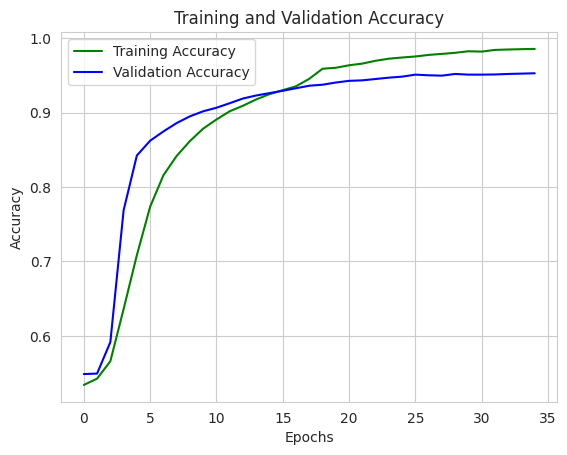

In [ ]:
epochs = history.epoch
plt.plot(epochs, history.history['accuracy'], 'g', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

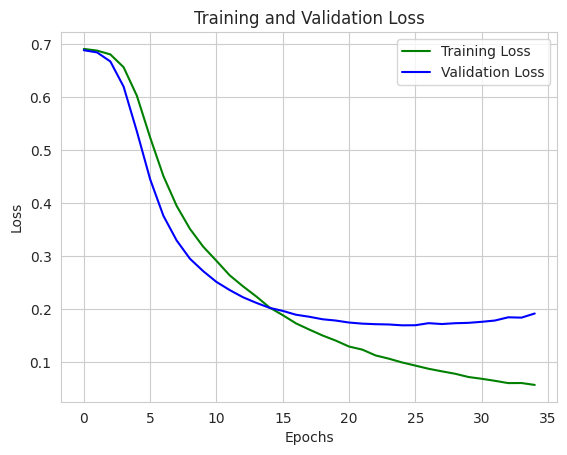

In [ ]:
epochs = history.epoch
plt.plot(epochs, history.history['loss'], 'g', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()